# Projeto 3- Ciencia de dados
## Alunos: 
    Willian Kenzo,
    Antonio Fuziy,
    Ramon Menegatto,
    Andre Rocco.
  
# Ideia:

    


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.graph_objs as go

In [41]:
IBM_semfiltro = pd.read_csv('IBM.csv')

IBM.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


## Limpeza de dados e separação


In [72]:
IBM.loc[IBM['Attrition'] == 'Yes', 'Attrition'] = 1

IBM.loc[IBM['Attrition'] == 'No', 'Attrition'] = 0


In [67]:
IBM.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrent

In [75]:
#Remoção de colunas que não serão utilizadas
IBM = IBM_semfiltro.drop(columns=['EmployeeCount','StandardHours','Over18','DailyRate','StandardHours'])


In [43]:
corr_matrix=IBM.corr()
corr_matrix

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [44]:
IBM.iloc[:,0:20].head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9


In [45]:
IBM.iloc[:,20:35].head()

,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,11,3,1,0,8,0,1,6,4,0,5
1,No,23,4,4,1,10,3,3,10,7,1,7
2,Yes,15,3,2,0,7,3,3,0,0,0,0
3,Yes,11,3,3,0,8,3,3,8,7,3,0
4,No,12,3,4,1,6,3,3,2,2,2,2


In [46]:
#with sns.axes_style('white'):
#    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
#                       hue='method', order=range(2001, 2015))
#    g.set_ylabels('Number of Planets Discovered')

In [47]:
#DataFrame Não Demitidos
NoAttrition = IBM.loc[(IBM['Attrition']==0)]
#DataFrame Demitidos
Attrition = IBM.loc[(IBM['Attrition']==1)]

In [48]:
#plt.figure(figsize=(13,5))
#plt.subplot(b121)
#plt.hist(NoAttrition['YearsSinceLastPromotion'],bins=20, color='steelblue', density=True);
#plt.subplot(122)
#plt.hist(Attrition['YearsSinceLastPromotion'],bins=20, color='red', density=True);

In [49]:
IBM.iloc[:,0:20].head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9


In [50]:
IBM.iloc[:,20:35].head()

,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,11,3,1,0,8,0,1,6,4,0,5
1,No,23,4,4,1,10,3,3,10,7,1,7
2,Yes,15,3,2,0,7,3,3,0,0,0,0
3,Yes,11,3,3,0,8,3,3,8,7,3,0
4,No,12,3,4,1,6,3,3,2,2,2,2


In [88]:
attri=IBM.Attrition.value_counts()

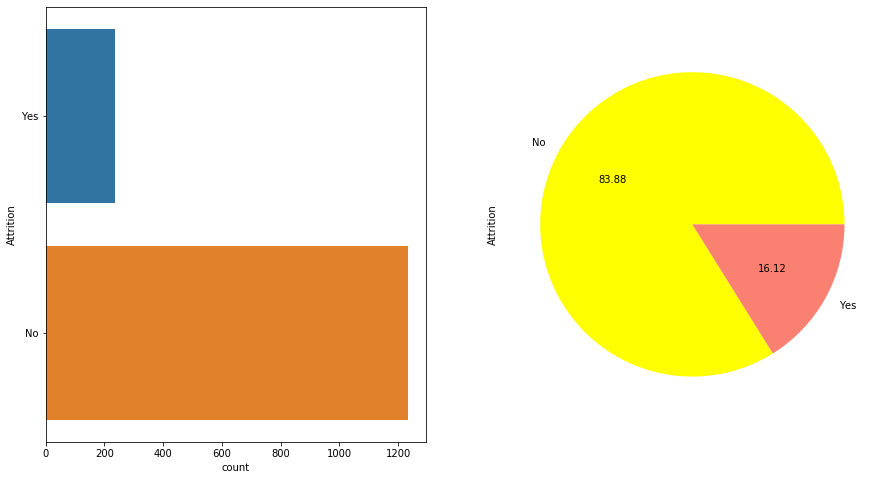

In [101]:
plt.figure(figsize=(15,8))
plt.subplot(121)
x = sns.countplot(y="Attrition",  data=IBM)
plt.subplot(122)
attri.plot(kind='pie', colors=('yellow', 'salmon', 'blue', 'red', 'green'), autopct="%.2f", legend=False)

In [59]:
#foi usado um def encontrado na internet como referencia, erro no codigo legenda errada
def plot(va) :

    colors = sns.color_palette("muted")
    trace1 = go.Pie(values  = Attrition[va].value_counts().values.tolist(),
                    labels  = Attrition[va].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "attrition employes",
                    marker  = dict(colors = colors, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = NoAttrition[va].value_counts().values.tolist(),
                    labels  = NoAttrition[va].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    marker  = dict(colors = colors, line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Non attrition employes" )

    layout = go.Layout(dict(title = va + " distribution in employes attrition ",
                            annotations = [dict(text = "Yes_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "No_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [60]:
plot("JobSatisfaction")

In [ ]:
plot("Gender")

In [ ]:
sns.barplot(x='Attrition',y="Attrition",hue="NumCompaniesWorked", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.ylabel('Frequência Relativa (%)');

In [ ]:
plot("BusinessTravel")

In [ ]:
sns.barplot(x='Attrition',y="Attrition",hue="EducationField", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.ylabel('Frequência Relativa (%)');

In [ ]:
plot("JobRole")

In [ ]:
sns.barplot(x='Attrition',y="Attrition",hue="OverTime", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.ylabel('Frequência Relativa (%)');

In [ ]:
plot("PerformanceRating")

In [ ]:
sns.barplot(x='Attrition',y="Attrition",hue="StockOptionLevel", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.ylabel('Frequência Relativa (%)');

In [ ]:
plot("WorkLifeBalance")

In [ ]:
sns.barplot(x='Attrition',y="Attrition",hue="YearsInCurrentRole", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.ylabel('Frequência Relativa (%)');

In [ ]:
plot("YearsSinceLastPromotion")

In [ ]:
sns.barplot(x='Attrition',y="Attrition",hue="YearsWithCurrManager", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.ylabel('Frequência Relativa (%)');

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='Attrition',y="Attrition",hue="YearsAtCompany", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.legend(loc='best',bbox_to_anchor=(1,1))
plt.ylabel('Frequência Relativa (%)');

In [ ]:
sns.violinplot(x="Attrition", y="DistanceFromHome", data=IBM, scale='count');

In [ ]:
sns.violinplot(x="Attrition", y="MonthlyIncome", data=IBM,scale="count")

In [ ]:
sns.violinplot(x="Attrition", y="HourlyRate", data=IBM,scale='count');

In [ ]:
sns.violinplot(x="Attrition", y="PercentSalaryHike", data=IBM, scale='count')

In [ ]:
sns.violinplot(x="Attrition", y="MonthlyRate", data=IBM, scale='count')

In [ ]:
sns.violinplot(x="Attrition", y="DailyRate", data=IBM, scale='count');

In [ ]:
x = IBM['Attrition']
y = IBM[['JobInvolvement','JobLevel','EnvironmentSatisfaction','DailyRate','Education','DistanceFromHome','Department','BusinessTravel','HourlyRate','MonthlyIncome']]


___
* ## **Decision Tree**

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
IBM.iloc[:,0:20].head()

In [ ]:
IBM.iloc[:,20:35].head()

In [ ]:
continuous_columns = ['Age','DailyRate','DistanceFromHome', 'Education', 'EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike',  'PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager'] 
b=IBM[continuous_columns]

a=b.corrwith(IBM['Attrition']).plot.bar(
        figsize = (20,10), title = "Correlation with E Signed", fontsize = 15,
        rot = 45, grid = True)

In [ ]:
X = IBM[['MonthlyIncome','Age','DistanceFromHome']]
y = IBM['Attrition']
decisiontree = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
decisiontree = decisiontree.fit(X,y)